# Projeto Padrões de Projeto

# Treinamento da Rede

Esta implementação tem como objetivo criar o treinamento da rede com curriculos os dados oriundos do lattes para classificação de demandas.

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_columns', 131)
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_colwidth', -1)

## Indice:
* [1. Carga dos Dados](#first-bullet)
* [2. Criação das Features](#second-bullet)
* [3. Treinamento da Rede](#4th-bullet)
* [4. Matrix de Confusão](#5th-bullet)


## 1. Carga dos dados <a class="anchor" id="first-bullet"></a>
As informações utilizadas para treinamento o  serão carregadas do arquivo dados_treino.csv ,arquivo criado com base nos dados oriundos do lattes

In [3]:
df = pd.read_csv("dados_treino.csv",sep=';')

In [4]:
df.head()

,Descricao,Class
0,possui graduacao em ciencias sociais pela universidade do vale do paraiba possui especializacao em gestao estrategica da inovacao tecnologica pela unicamp atualmente e professor de inovacao e empreendedorismo da fatec sao jose dos campos tem experiencia na area de gestao de projetos de inovacao atuando principalmente nos seguintes temas inovacao tecnologica gestao de projetos parques tecnologicos incubadoras modelagem de negocios e captacao de recursos publicos e privados ciencias sociais,0
1,possui graduacao em direito pela faculdade de direito de taubate graduacao em letras pela faculdade de filosofia ciencias e letras de taubate graduacao em pedagogia pela faculdade de educacao de guaratingueta mestrado em direito pela pontificia universidade catolica de sao paulo e doutorado em direito pela pontificia universidade catolica de sao paulo atualmente e professora de direito e comunicacao e expressao da faculdade de tecnologia de sao jose dos campos direito letras pedagogia direito law direito law,0
2,mestre em engenharia eletronica e computacao instituo tecnologico de aeronautica engenheiro de infraestrutura aeronautica instituto tecnologico de aeronautica professor da faculdade de tecnologia de sao jose dos campos das disciplinas arquitetura e organizacao de computadores fundamentos de redes de computadores tecnologia e ambiente e meio ambiente e saude professor da disciplina ciencias ambientais e das aguas da faculdade de tecnologia de jacarei socio diretor das empresas micro assist infomatica ltda e actie ltda com sede em sao jose dos campos experiencia na area de informatica redes de computadores microcomputadores cabeamento estruturado de redes fibras oticas etc engenharia civil engenharia mecanica transmissao e conservacao de energia educacao em energia e meio ambiente ex diretor da fatec guaratingueta ex diretor da fatec sao jose dos campos e ex coordenador dos cursos de estruturas leves automacao aeronautica e projetos de estruturas aeronauticas da fatec sao jose dos campos engenharia de infreestrutura aeronautica estudo comparativo tecnico e economico entre metodos de dimensionamento de pavimentos aeroportuarios formacao de oficiais aviadores engenharia eletronica e computacao um sistema computadorizado de baixo custo para treinar controladores em radar de aproximacao de precisao sipar electric engineering controle de trafego aereo engenharia mecanica mechanical engineering,0
3,possui graduacao em fisica pela universidade de sao paulo mestrado em sensoriamento remoto pelo instituto nacional de pesquisas espaciais e doutorado em computacao aplicada pelo instituto nacional de pesquisas espaciais tem experiencia na area de computacao com enfase em otimizacao combinatoria atuando principalmente nos seguintes temas problemas de localizacao problema das pmedianas capacitado problema de roteamento de veiculos tendo interesse tambem por programacao orientada a objetos e algoritmos atualmente professor categoria iiid e coordenador do curso de tecnologia em analise e desenvolvimento de sistema da fatec de sao jose dos campos fisica sensoriamento remoto simulacao do coeficiente de retroespalhamento de radar na banda c para solos nus tipicos do estado de sao paulo geosciences retroespalhamento radar computacao aplicada heuristica de localizacaoalocacao para problemas de localizacao de facilidades computer science,0
4,possui graduacao em ciencia da computacao pelo centro universitario do triangulo mestrado e doutorado em computacao aplicada pelo inpe instituto nacional de pesquisas espaciais atuou em projetos de armazenamento e disseminacao de dados ambientais no inpe atualmente e professor da etep faculdades centro universitario eniac faculdade inpg de sao jose dos campos e fatec de jacarei e sao jose dos campos possui experiencia na area de ciencia da computacao com enfase em banco de dados e desenvolvimento de sistemas web ciencia da computacao computacao aplicada esqueletos isotropicos computer science morfo

## 2. Criação das Features <a class="anchor" id="second-bullet"></a>

In [5]:
colunas = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q',
                                  'r','s','t','u','v','w','x','y','z','1','2','3','4','5','6','7','8','9','0']
df = df[['Descricao','Class']]

# Criando as colunas no dataframe.
for col in colunas:
    df[col] = 0

for x in colunas:
    df[x] = df['Descricao'].str.count(x)

In [6]:
df1 = df[df['Class'] == 0]
df2 = df[df['Class'] == 1]
df3 = df[df['Class'] == 2]

In [7]:
a, b = np.split(df1, [int(.2*len(df1))])
c, d = np.split(df2, [int(.2*len(df2))])
e, f = np.split(df3, [int(.2*len(df3))])

In [8]:
frames_treino = [b,d,f]
frames_teste = [a,c,e]

In [9]:
df = pd.concat(frames_treino)
df2 = pd.concat(frames_teste)

In [25]:
x_train = df.copy()
#y_train = train_dataset['produto_id']
y_train = df['Class']
#remove os campos relacionados a descrição e labels (produto_id)
del x_train['Descricao']

In [26]:
def gerawords(desc):
    return desc.lower().split()

In [27]:
codtotal={}
wordtotal={}

for d in df['Descricao']:
    for w in gerawords(d):
        if w not in wordtotal:
            wordtotal[w] = len(wordtotal)
for d in df['Class']:    
    if d not in codtotal:
        codtotal[d] = len(codtotal)

In [28]:
x_train.head()

,Class,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,1,2,3,4,5,6,7,8,9,0
5,0,54,5,21,19,54,4,10,3,24,2,0,14,17,20,38,9,1,23,16,19,10,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,60,3,23,25,38,2,9,1,35,0,0,15,8,19,29,16,0,20,35,19,16,4,0,0,0,2,0,0,0,0,0,0,0,0,0,0
7,0,136,9,68,70,146,11,21,7,82,6,0,38,33,63,110,38,0,54,70,51,21,10,0,1,0,2,0,0,0,0,0,0,0,0,0,0
8,0,103,6,44,57,92,11,12,4,59,2,0,22,15,33,62,21,4,39,48,34,20,8,1,0,0,3,0,0,0,0,0,0,0,0,0,0
9,0,153,15,70,47,122,12,11,6,84,1,0,44,34,55,64,32,1,50,37,50,33,6,0,1,0,5,0,0,0,0,0,0,0,0,0,0


In [29]:
y_train.head()

5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

In [30]:
x_test = df2.copy()
y_test = df2['Class']

In [31]:
del x_test['Descricao']
print(x_train.shape)
print(x_test.shape)

(84, 37)
(19, 37)


In [32]:
x_train.head()

,Class,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,1,2,3,4,5,6,7,8,9,0
5,0,54,5,21,19,54,4,10,3,24,2,0,14,17,20,38,9,1,23,16,19,10,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,60,3,23,25,38,2,9,1,35,0,0,15,8,19,29,16,0,20,35,19,16,4,0,0,0,2,0,0,0,0,0,0,0,0,0,0
7,0,136,9,68,70,146,11,21,7,82,6,0,38,33,63,110,38,0,54,70,51,21,10,0,1,0,2,0,0,0,0,0,0,0,0,0,0
8,0,103,6,44,57,92,11,12,4,59,2,0,22,15,33,62,21,4,39,48,34,20,8,1,0,0,3,0,0,0,0,0,0,0,0,0,0
9,0,153,15,70,47,122,12,11,6,84,1,0,44,34,55,64,32,1,50,37,50,33,6,0,1,0,5,0,0,0,0,0,0,0,0,0,0


In [33]:
x_test.head()

,Class,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,1,2,3,4,5,6,7,8,9,0
0,0,56,3,31,21,56,2,11,0,34,3,0,11,12,22,48,19,1,18,37,19,12,7,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,66,2,22,42,60,9,10,0,38,1,0,21,9,9,40,15,0,22,20,26,20,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,158,7,78,71,173,16,23,8,92,6,0,19,45,71,120,25,1,89,80,78,41,6,0,6,0,2,0,0,0,0,0,0,0,0,0,0
3,0,115,8,50,45,99,7,7,3,60,2,0,32,37,39,92,34,2,41,62,47,22,4,0,1,0,4,0,0,0,0,0,0,0,0,0,0
4,0,88,3,48,36,81,6,6,0,49,4,0,15,28,34,72,30,3,26,49,37,24,5,1,3,0,1,0,0,0,0,0,0,0,0,0,0


In [36]:
dfx_train = x_train
dfy_train = y_train
dfx_test = x_test
dfy_test = y_test
x_train = x_train[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
       'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']]
x_test = x_test[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
       'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']]
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## 3. Treinamento da Rede <a class="anchor" id="4th-bullet"></a>

In [38]:
Sequential = tf.keras.models.Sequential
Activation = tf.keras.layers.Activation 
Dense = tf.keras.layers.Dense 

model = Sequential([
    Dense(100, input_shape=(x_train.shape[1],)),
    Activation('relu'),
    Dense(200, input_shape=(x_train.shape[1],)),
    Activation('tanh'),
    #Dense(400, input_shape=(x_train.shape[1],)),
    #Activation('relu'),        
    Dense(len(codtotal)),
    #Dense(1),
    Activation('softmax'),
])


model.compile(optimizer='adam',
              #loss='categorical_crossentropy',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               3700      
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_4 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 603       
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 24,503
Trainable params: 24,503
Non-trainable params: 0
_________________________________________________________________


In [39]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
84/84 [==============================] - 0s 3ms/sample - loss: 1.5224 - acc: 0.2738
Epoch 2/100
84/84 [==============================] - 0s 131us/sample - loss: 1.2085 - acc: 0.3690
Epoch 3/100
84/84 [==============================] - 0s 131us/sample - loss: 1.0250 - acc: 0.3810
Epoch 4/100
84/84 [==============================] - 0s 127us/sample - loss: 1.0227 - acc: 0.4524
Epoch 5/100
84/84 [==============================] - 0s 131us/sample - loss: 1.0209 - acc: 0.4643
Epoch 6/100
84/84 [==============================] - 0s 131us/sample - loss: 0.9962 - acc: 0.5238
Epoch 7/100
84/84 [==============================] - 0s 142us/sample - loss: 0.9733 - acc: 0.5238
Epoch 8/100
84/84 [==============================] - 0s 119us/sample - loss: 0.9622 - acc: 0.5357
Epoch 9/100
84/84 [==============================] - 0s 119us/sample - loss: 0.9819 - acc: 0.5238
Epoch 10/100
84/84 [==============================] - 0s 131us/sample - loss: 0.9571 - acc: 0.5119
Epoch 11/100
84/84 [=

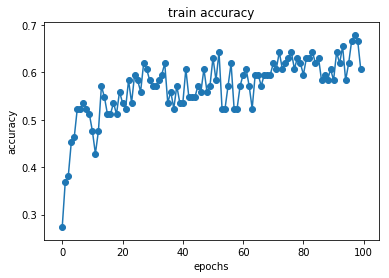

In [40]:
acc = hist.history['acc']
plt.plot(acc)
plt.scatter(range(len(acc)),acc)
plt.title("train accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [41]:
y_pred = model.predict(x_test)

In [42]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [43]:
y_pred_i = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
y_test_i = y_test

In [44]:
accuracy = accuracy_score(y_pred_i, y_test_i)
accuracy

0.5789473684210527

In [45]:
report = classification_report(y_test_i, y_pred_i)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.67      0.33      0.44         6
           2       0.50      0.88      0.64         8

    accuracy                           0.58        19
   macro avg       0.72      0.54      0.55        19
weighted avg       0.68      0.58      0.56        19



## 4. Matriz de Confusão <a class="anchor" id="5th-bullet"></a>

In [46]:
confusion_matrix(y_test_i, y_pred_i, labels=[0, 1, 2])

array([[2, 0, 3],
       [0, 2, 4],
       [0, 1, 7]], dtype=int64)

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2 0 3]
 [0 2 4]
 [0 1 7]]


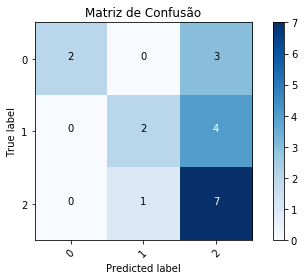

In [48]:
cnf_matrix = confusion_matrix(y_test_i, y_pred_i, labels=[0, 1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2],
                      title='Matriz de Confusão')